## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

**Описание данных**
* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:**
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.


### Просмотр данных

#### Регион 0

In [ ]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
data_0.duplicated().sum()

0

Полных дубликатов нет.

Некоторые id повторяют друг друга. удалим эти дубли. То же сделаем и со следующими регионами.

In [ ]:
print('Размер выборки до удаления дубликатов:', len(data_0))
print('Количество уникальных наименований скважин:', len(data_0['id'].unique()))
double_id = pd.DataFrame(data_0['id'].value_counts()).query('id > 1')
data_0 = data_0.query('id not in @double_id.index')
print()
print('Размер выборки после удаления дубликатов:', len(data_0))
print('Количество уникальных наименований скважин:', len(data_0['id'].unique()))

Размер выборки до удаления дубликатов: 100000
Количество уникальных наименований скважин: 99990

Размер выборки после удаления дубликатов: 99980
Количество уникальных наименований скважин: 99980


#### Регион 1

In [ ]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
data_1.duplicated().sum()

0

In [ ]:
print('Размер выборки до удаления дубликатов:', len(data_1))
print('Количество уникальных наименований скважин:', len(data_1['id'].unique()))
double_id = pd.DataFrame(data_1['id'].value_counts()).query('id > 1')
data_1 = data_1.query('id not in @double_id.index')
print()
print('Размер выборки после удаления дубликатов:', len(data_1))
print('Количество уникальных наименований скважин:', len(data_1['id'].unique()))

Размер выборки до удаления дубликатов: 100000
Количество уникальных наименований скважин: 99996

Размер выборки после удаления дубликатов: 99992
Количество уникальных наименований скважин: 99992


#### Регион 2

In [ ]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
data_2.duplicated().sum()

0

In [ ]:
print('Размер выборки до удаления дубликатов:', len(data_2))
print('Количество уникальных наименований скважин:', len(data_2['id'].unique()))
double_id = pd.DataFrame(data_2['id'].value_counts()).query('id > 1')
data_2 = data_2.query('id not in @double_id.index')
print()
print('Размер выборки после удаления дубликатов:', len(data_2))
print('Количество уникальных наименований скважин:', len(data_2['id'].unique()))

Размер выборки до удаления дубликатов: 100000
Количество уникальных наименований скважин: 99996

Размер выборки после удаления дубликатов: 99992
Количество уникальных наименований скважин: 99992


### Распределения признаков

In [ ]:
def distributions(data):
    data.boxplot('f0')
    plt.title('Боксплот признака f0')
    plt.show()
    data['f0'].hist()
    plt.title('Гистограмма признака f0')
    plt.show()
    
    data.boxplot('f1')
    plt.title('Боксплот признака f1')
    plt.show()
    data['f1'].hist()
    plt.title('Гистограмма признака f1')
    plt.show()
    
    data.boxplot('f2')
    plt.title('Боксплот признака f2')
    plt.show()
    data['f2'].hist()
    plt.title('Гистограмма признака f2')
    plt.show()

#### Регион 0

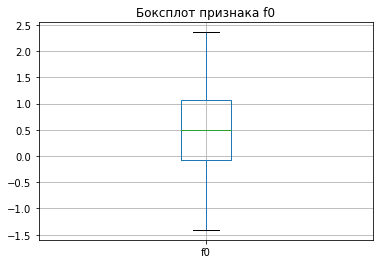

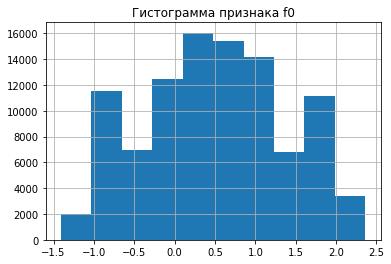

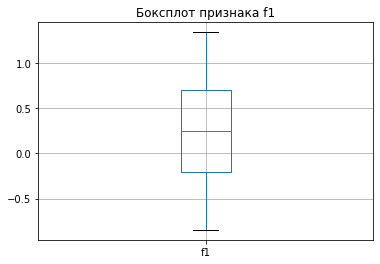

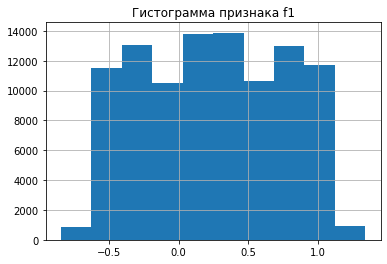

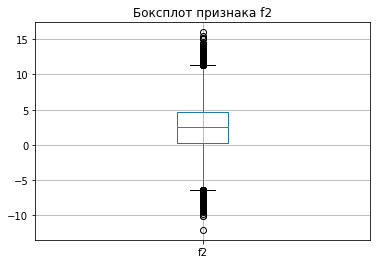

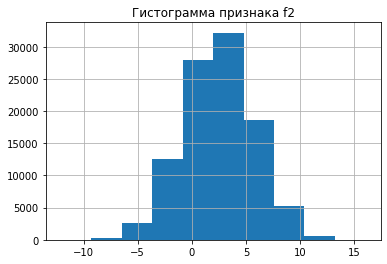

In [ ]:
distributions(data_0)

#### Регион 1

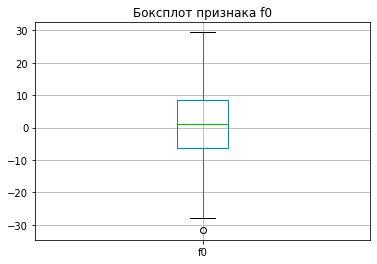

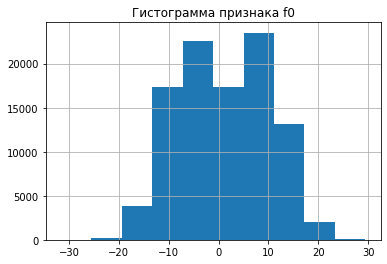

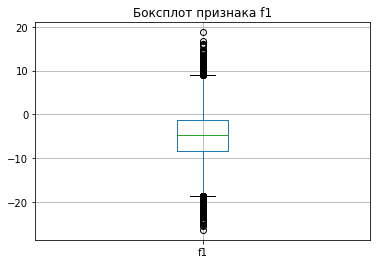

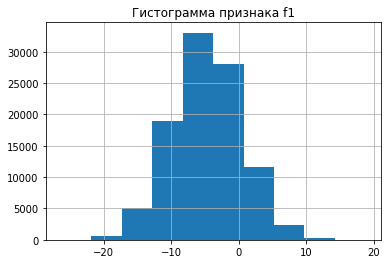

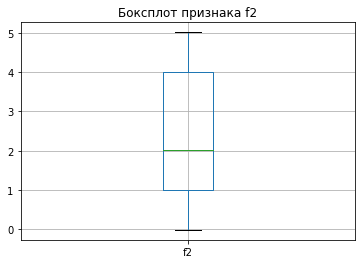

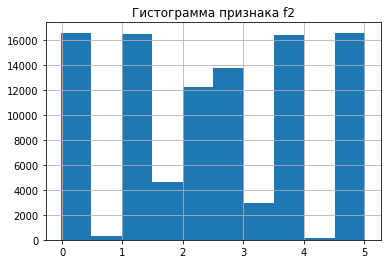

In [ ]:
distributions(data_1)

#### Регион 2

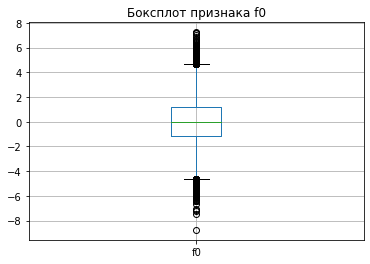

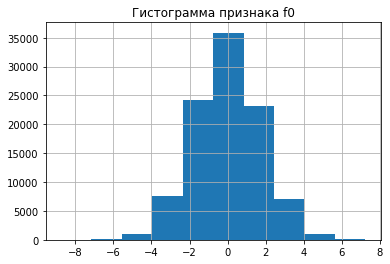

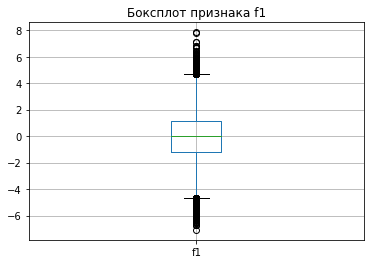

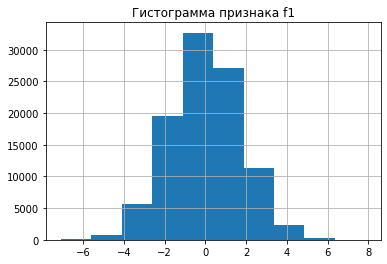

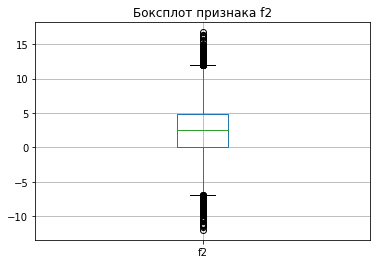

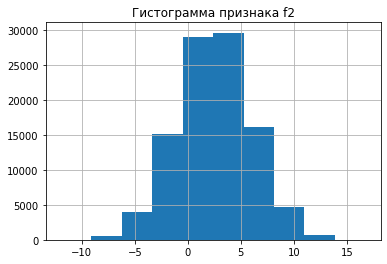

In [ ]:
distributions(data_2)

Все признаки распределены более или менее равномерно относительно среднего. Серьёзно перекашивающих выборку выбросов не замечено. 

### Корреляции признаков

In [ ]:
def corr_matrix(data):
    data_corr = data.corr()
    return data_corr.style.background_gradient(cmap='coolwarm')

**Регион 0**

In [ ]:
corr_matrix(data_0)

,f0,f1,f2,product
f0,1,-0.440724,-0.00320445,0.143504
f1,-0.440724,1,0.00178344,-0.192338
f2,-0.00320445,0.00178344,1,0.483628
product,0.143504,-0.192338,0.483628,1


**Регион 1**

In [ ]:
corr_matrix(data_1)

,f0,f1,f2,product
f0,1,0.182263,-0.00182071,-0.0305337
f1,0.182263,1,-0.00260831,-0.0101672
f2,-0.00182071,-0.00260831,1,0.999397
product,-0.0305337,-0.0101672,0.999397,1


**Регион 2**

In [ ]:
corr_matrix(data_2)

,f0,f1,f2,product
f0,1,0.000501292,-0.000454264,-0.00197353
f1,0.000501292,1,0.00076296,-0.00104555
f2,-0.000454264,0.00076296,1,0.445873
product,-0.00197353,-0.00104555,0.445873,1


По корреляционной матрице региона 1 мы видим наличие корреляции между признаком f2 и целевым признаком product.
В остальных двух коэффициент корреляции между этими признаками ниже, до явной линейной зависимости не дотягивает. 
Посмотрим, как этот показатель скажется на обучении модели.

### Разделение на тренировочную и валидационную выборки

Целевой признак - product. Остальные запишем во features (все, кроме id, он никак не поможет обучению)

In [ ]:
# регион 0
features_0 = data_0.drop(['product','id'], axis=1)
target_0 = data_0['product']

# регион 1
features_1 = data_1.drop(['product','id'], axis=1)
target_1 = data_1['product']

# регион 2
features_2 = data_2.drop(['product','id'], axis=1)
target_2 = data_2['product']

In [ ]:
# регион 0
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

# регион 1
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

# регион 2
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

### Масштабирование признаков

In [ ]:
# регион 0
scaler_0 = StandardScaler()
scaler_0.fit(features_train_0)
features_train_0 = scaler_0.transform(features_train_0)
features_valid_0 = scaler_0.transform(features_valid_0)

# регион 1
scaler_1 = StandardScaler()
scaler_1.fit(features_train_1)
features_train_1 = scaler_1.transform(features_train_1)
features_valid_1 = scaler_1.transform(features_valid_1)

# регион 2
scaler_2 = StandardScaler()
scaler_2.fit(features_train_2)
features_train_2 = scaler_2.transform(features_train_2)
features_valid_2 = scaler_2.transform(features_valid_2)

## Обучение и проверка моделей

In [ ]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0) 

predictions_valid_0 = model_0.predict(features_valid_0)
product_predict_mean_0 = predictions_valid_0.mean()

rmse_0 = sqrt(mean_squared_error(target_valid_0, predictions_valid_0))

print('Регион 0')
print('product_predict_mean:', product_predict_mean_0)
print('rmse:', rmse_0)

Регион 0
product_predict_mean: 92.42384109947358
rmse: 37.716904960382735


In [ ]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1) 

predictions_valid_1 = model_1.predict(features_valid_1)
product_predict_mean_1 = predictions_valid_1.mean()

rmse_1 = sqrt(mean_squared_error(target_valid_1, predictions_valid_1))

print('Регион 1')
print('product_predict_mean:', product_predict_mean_1)
print('rmse:', rmse_1)

Регион 1
product_predict_mean: 68.98311857983121
rmse: 0.8914901390348529


In [ ]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2) 

predictions_valid_2 = model_2.predict(features_valid_2)
product_predict_mean_2 = predictions_valid_2.mean()

rmse_2 = sqrt(mean_squared_error(target_valid_2, predictions_valid_2))

print('Регион 2')
print('product_predict_mean:', product_predict_mean_2)
print('rmse:', rmse_2)

Регион 2
product_predict_mean: 95.11622302076478
rmse: 39.975543264382345


Вот тут мы и видим, как повели себя коррелирующие признаки - точность model_1 в разы выше точности моделей для других регионов.

## Подготовка к расчёту прибыли

Приведем фактические и предсказанные данные в удобный для дальнейших рассчетов вид. predictions по сути список, соответствующий списку target, поэтому отбросим индексы target, чтобы серии были совместимы.

In [ ]:
predictions_valid_0 = pd.Series(predictions_valid_0)
predictions_valid_1 = pd.Series(predictions_valid_1)
predictions_valid_2 = pd.Series(predictions_valid_2)
target_valid_0 = target_valid_0.reset_index(drop=True)
target_valid_1 = target_valid_1.reset_index(drop=True)
target_valid_2 = target_valid_2.reset_index(drop=True)

Введём переменные по условию задачи

In [ ]:
BUDGET = 10000000000 # рублей
BARELL_COST = 450*1000 # рублей за 1000 баррелей
OIL_DRILLING_COST = BUDGET/200 # так как в каждом регионе выбираем 200 точек, делаем вывод, 
                               # что на одну точку можем потратить 1/200 часть бюджета

Рассчитаем потенциальную прибыль по всем точкам в регионах

In [ ]:
potential_income_0 = target_valid_0*BARELL_COST
potential_predict_income_0 = predictions_valid_0*BARELL_COST

potential_income_1 = target_valid_1*BARELL_COST
potential_predict_income_1 = predictions_valid_1*BARELL_COST

potential_income_2 = target_valid_2*BARELL_COST
potential_predict_income_2 = predictions_valid_2*BARELL_COST

Сравним среднюю потенциальную прибыль в каждом регионе с затратами на одну точку.

In [ ]:
potential_income_mean = {
    'finance_in_million_rubles': ['potential income', 
                            'potential predict income', 
                            'oil drilling cost'],
    'region_0': [potential_income_0.mean()/1000000, 
                 potential_predict_income_0.mean()/1000000, 
                 OIL_DRILLING_COST/1000000],
    'region_1': [potential_income_1.mean()/1000000, 
                 potential_predict_income_1.mean()/1000000, 
                 OIL_DRILLING_COST/1000000],
    'region_2': [potential_income_2.mean()/1000000, 
                 potential_predict_income_2.mean()/1000000, 
                 OIL_DRILLING_COST/1000000],
}
potential_income_mean_data = pd.DataFrame(potential_income_mean).set_index('finance_in_million_rubles')
potential_income_mean_data 

,region_0,region_1,region_2
finance_in_million_rubles,,,
potential income,41.577070,31.041168,42.546518
potential predict income,41.590728,31.042403,42.802300
oil drilling cost,50.000000,50.000000,50.000000


Затраты на одну точку очевино превышают среднюю прибыль от одной точки. Придётся выбирать тщательно.

Посчитаем количество убыточных точек в каждом регионе по факту и по предсказаниям.

In [ ]:
unprofitable_0 = (potential_income_0 <= OIL_DRILLING_COST)*1
unprofitable_predict_0 = (potential_predict_income_0 <= OIL_DRILLING_COST)*1

unprofitable_1 = (potential_income_1 <= OIL_DRILLING_COST)*1
unprofitable_predict_1 = (potential_predict_income_1 <= OIL_DRILLING_COST)*1

unprofitable_2 = (potential_income_2 <= OIL_DRILLING_COST)*1
unprofitable_predict_2 = (potential_predict_income_2 <= OIL_DRILLING_COST)*1

In [ ]:
potential_unprofitable = {
    'unprofitable': ['potential unprofitable', 'potential unprofitable predict'],
    'region_0': [unprofitable_0.sum(), unprofitable_predict_0.sum()],
    'region_1': [unprofitable_1.sum(), unprofitable_predict_1.sum()],
    'region_2': [unprofitable_2.sum(), unprofitable_predict_2.sum()],
}
potential_unprofitable_data = pd.DataFrame(potential_unprofitable).set_index('unprofitable')
potential_unprofitable_data

,region_0,region_1,region_2
unprofitable,,,
potential unprofitable,15885,20818,15556
potential unprofitable predict,19635,20411,19660


По 0 и 2 регионам модель предсказывает больше убыточных точек, чем их есть на самом деле. В регионе 1 цифра близка к точной.

In [ ]:
potential_profitable = {
    'profitable': ['potential profitable', 
                   'potential profitable_predict'],
    'region_0': [len(target_valid_0) - unprofitable_0.sum(), 
                 len(predictions_valid_0) - unprofitable_predict_0.sum()],
    'region_1': [len(target_valid_1) - unprofitable_1.sum(), 
                 len(predictions_valid_1) - unprofitable_predict_1.sum()],
    'region_2': [len(target_valid_2) - unprofitable_2.sum(), 
                 len(predictions_valid_2) - unprofitable_predict_2.sum()],
}
potential_profitable_data = pd.DataFrame(potential_profitable).set_index('profitable')
potential_profitable_data

,region_0,region_1,region_2
profitable,,,
potential profitable,9110,4180,9442
potential profitable_predict,5360,4587,5338


В регионах от 4180 до 9442 прибыльных точек. 

Посмотрим сколько нефти должно быть в одной точке, чтобы она считалаь прибыльной, и сравним со средними запасами нефти по регионам. 

In [ ]:
min_product_for_profit = {
    'product': ['product_min_for_profit', 'product_predict_min_for_profit', 'product_mean'],
    'region_0': [target_valid_0[unprofitable_0[unprofitable_0 == 0].index].min(), 
                 predictions_valid_0[unprofitable_predict_0[unprofitable_predict_0 == 0].index].min(), 
                 target_valid_0.mean()],
    'region_1': [target_valid_1[unprofitable_1[unprofitable_1 == 0].index].min(), 
                 predictions_valid_1[unprofitable_predict_1[unprofitable_predict_1 == 0].index].min(), 
                 target_valid_1.mean()],
    'region_2': [target_valid_2[unprofitable_2[unprofitable_2 == 0].index].min(), 
                 predictions_valid_2[unprofitable_predict_2[unprofitable_predict_2 == 0].index].min(), 
                 target_valid_2.mean()],
}
min_product_for_profit_data = pd.DataFrame(min_product_for_profit).set_index('product')
min_product_for_profit_data

,region_0,region_1,region_2
product,,,
product_min_for_profit,111.127589,134.766305,111.117229
product_predict_min_for_profit,111.111297,111.111654,111.112366
product_mean,92.393490,68.980373,94.547818


В среднем по всем регионам нефти меньше необходимого.

Напишем функцию, которая отсортирует по запасу нефти точки в регионе и выберет самые прибыльные.

In [ ]:
def sum_income(target, predicted, count):
    predicted_sorted = predicted.sort_values(ascending=False)
    selected = target[predicted_sorted.index][:count]
    selected_sum = selected.sum()
    total_potential_income = selected_sum*BARELL_COST - BUDGET
    return total_potential_income

Посмотрим, какой максимальный доход каждый регион может получить со своих лучших 200 точек.

In [ ]:
total_potential_income_0 = sum_income(target_valid_0, predictions_valid_0, 200)
total_potential_income_1 = sum_income(target_valid_1, predictions_valid_1, 200)
total_potential_income_2 = sum_income(target_valid_2, predictions_valid_2, 200)

print('Общий потенциальный доход в регионе 0:', total_potential_income_0)
print('Общий потенциальный доход в регионе 1:', total_potential_income_1)
print('Общий потенциальный доход в регионе 2:', total_potential_income_2)

Общий потенциальный доход в регионе 0: 3136026056.655861
Общий потенциальный доход в регионе 1: 2415086696.681511
Общий потенциальный доход в регионе 2: 2465945792.012266


Самым богатым на запасы является регион 0.

## Расчёт прибыли и рисков 

Применим технику Bootstrap с 1000 выборок, чтобы найти распределения прибыли в трёх регионах.

In [ ]:
STATE = np.random.RandomState(12345)
COUNT = 200
REITERATIONS = 1000
SAMPLE_SIZE = 500

def bootstrap(target, predictions, reiterations, sample_size, count):
    values = []
    for i in range(reiterations):
        target_subsample = target.sample(n=sample_size, random_state=STATE, replace=True)
        predicted_subsample = predictions[target_subsample.index]
        income = sum_income(target_subsample, predicted_subsample, count)
        values.append(income)

    values = pd.Series(values) 
    mean = values.mean() 
    risk = (values<0).mean()*100 
    #confidence_interval = st.t.interval(0.95, len(values)-1, loc=values.mean(), scale=values.sem()) 
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    quantile_confidence_interval = (lower, upper)

    return int(mean), quantile_confidence_interval, risk

In [ ]:
mean_0, quantile_confidence_interval_0, risk_0 = bootstrap(target_valid_0, 
                                                  predictions_valid_0, 
                                                  REITERATIONS, SAMPLE_SIZE, COUNT)

mean_1, quantile_confidence_interval_1, risk_1 = bootstrap(target_valid_1, 
                                                  predictions_valid_1, 
                                                  REITERATIONS, SAMPLE_SIZE, COUNT)

mean_2, quantile_confidence_interval_2, risk_2 = bootstrap(target_valid_2, 
                                                  predictions_valid_2, 
                                                  REITERATIONS, SAMPLE_SIZE, COUNT)

In [ ]:
profit_and_risk = pd.DataFrame({
    'profit_and_risk_indicators': ['total_potential_income_mln', 'income_mean_bootstrap_mln', 'confidence_interval', 'risk_in_%'],
    'region_0': [int(total_potential_income_0)/1000000, mean_0/1000000, quantile_confidence_interval_0, risk_0],
    'region_1': [int(total_potential_income_1)/1000000, mean_1/1000000, quantile_confidence_interval_1, risk_1],
    'region_2': [int(total_potential_income_2)/1000000, mean_2/1000000, quantile_confidence_interval_2, risk_2],
}).set_index('profit_and_risk_indicators')
profit_and_risk

,region_0,region_1,region_2
profit_and_risk_indicators,,,
total_potential_income_mln,3136.03,2415.09,2465.95
income_mean_bootstrap_mln,459.086,523.579,341.472
confidence_interval,"(-90234067.10362324, 987953883.1101811)","(133791191.22885112, 961450161.0437706)","(-198355934.11350116, 852708580.7650115)"
risk_in_%,4.7,0.6,11.6


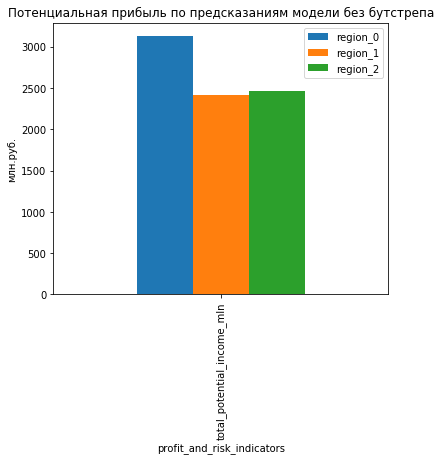

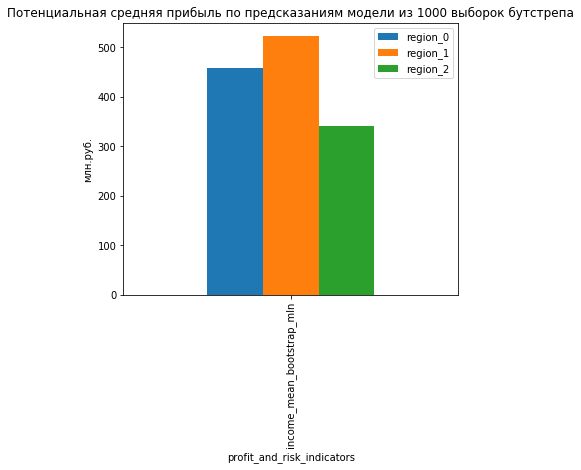

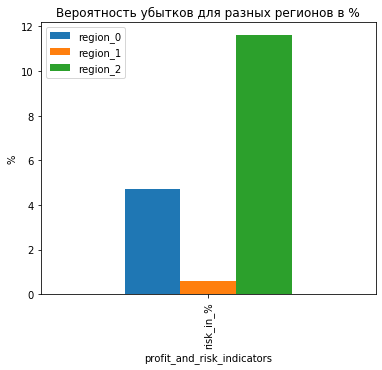

In [ ]:
profit_and_risk[profit_and_risk.index =='total_potential_income_mln'].plot(kind='bar', figsize=(6,5))
plt.title('Потенциальная прибыль по предсказаниям модели без бутстрепа')
plt.ylabel('млн.руб.')
plt.show()
profit_and_risk[profit_and_risk.index =='income_mean_bootstrap_mln'].plot(kind='bar', figsize=(6,5))
plt.title('Потенциальная средняя прибыль по предсказаниям модели из 1000 выборок бутстрепа')
plt.ylabel('млн.руб.')
plt.show()
profit_and_risk[profit_and_risk.index =='risk_in_%'].plot(kind='bar', figsize=(6,5))
plt.title('Вероятность убытков для разных регионов в %')
plt.ylabel('%')
plt.show()

Без бутстрепа из трех валидационных выборок по потенциальной прибыли побеждал регион 0.
Однако, после процедуры изъятия из наших валидационных выборок тысячи подвыборок мы получили распределения потенциальной прибыли по регионам, из которых мы выбираем регион 1. 

Причины:
1. Средняя прибыль в регионе 1 выше, чем в остальных.
2. Риск убытков минимален (0.6%), тогда как в двух других регионах он выше заданной границы в 2.5%.
3. <div class="alert alert-info">Если мы посмотрим на доверительные интервалы, то увидим, что в регионе 1 95%-й доверительный интервал полностью прибыльный, в отличие от двух других регионов, где мы видим отрицательные нижние границы интервалов. Также разброс вероятных значений прибыли в регионе 0 ниже, чем в остальных двух регионах.</div> 

Все эти плюсы обеспечены точностью модели. Фактически запасы нефти в регионе 1 меньше, чем у конкурентов. 

## Вывод

После проведённого исследования для разработки нами был предложен Регион 1, так как для него удалось наиболее точно предсказать прибыльные скважины с наименьшим риском убытков и разбросом потенциальной прибыли от 200 точек. 